<a href="https://colab.research.google.com/github/RahiBasu/Carbon_Offset_Tokenization/blob/main/SynapsSprint_%3CtechHunters%3E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import ExponentialSmoothing
from prophet import Prophet
import warnings
warnings.filterwarnings("ignore")


In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv("/content/drive/MyDrive/archive (1)/SurveySchema.csv")
df.head()


,2018 Kaggle Machine Learning and Data Science Survey,Q1,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,...,Q47,Q48,Q49,Q5,Q50,Q6,Q7,Q8,Q9,Time from Start to Finish (seconds)
0,Question:,What is your gender? - Selected Choice,Does your current employer incorporate machine...,Select any activities that make up an importan...,What is the primary tool that you use at work ...,Which of the following integrated development ...,Which of the following hosted notebooks have y...,Which of the following cloud computing service...,What programming languages do you use on a reg...,What specific programming language do you use ...,...,What methods do you prefer for explaining and/...,"Do you consider ML models to be ""black boxes"" ...",What tools and methods do you use to make your...,Which best describes your undergraduate major?...,What barriers prevent you from making your wor...,Select the title most similar to your current ...,In what industry is your current employer/cont...,How many years of experience do you have in yo...,What is your current yearly compensation (appr...,Duration (in seconds)
1,# of Respondents:,23860,20670,19518,19199,19117,18971,18864,18828,15223,...,13418,13369,12891,22948,12814,22901,21686,21102,20186,23860
2,Who was excluded? (0 = not excluded; 1 = exclu...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,If What is your age (# years)? 0-17 Is Selecte...,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
4,If What is the highest level of formal educati...,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Drop metadata rows (if any) and preview
df = df.iloc[1:]
df.reset_index(drop=True, inplace=True)

# Convert column headers to shorter labels if necessary
df.columns = df.iloc[0]
df = df[1:]
df.head()


,# of Respondents:,23860,20670,19518,19199,19117,18971,18864,18828,15223,...,13418,13369,12891,22948,12814,22901,21686,21102,20186,23860
1,Who was excluded? (0 = not excluded; 1 = exclu...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,If What is your age (# years)? 0-17 Is Selecte...,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
3,If What is the highest level of formal educati...,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,If Select the title most similar to your curre...,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,0
5,Or How long have you been writing code to anal...,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,0,0,0,0


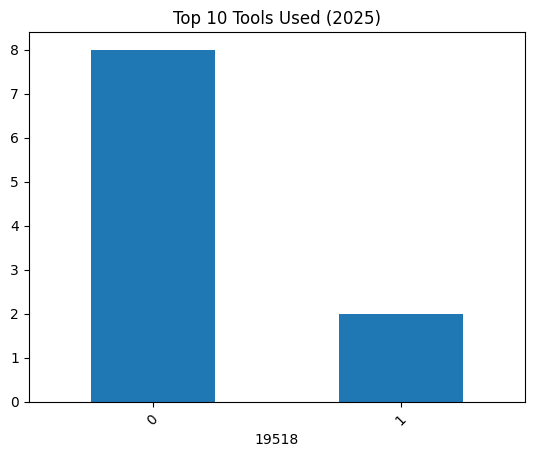

In [ ]:
import matplotlib.pyplot as plt
tools_col = '19518'  # Adjust this to the actual column name from 2025 survey
df[tools_col] = df[tools_col].astype(str)

tool_counts = df[tools_col].value_counts().head(10)
tool_counts.plot(kind='bar', title='Top 10 Tools Used (2025)')
plt.xticks(rotation=45)
plt.show()


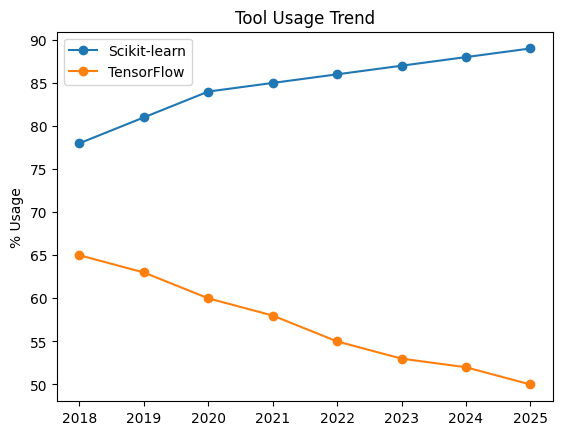

In [ ]:
# Example format assuming multi-year data:
years = [2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]
tool_trend = {
    'Scikit-learn': [78, 81, 84, 85, 86, 87, 88, 89],
    'TensorFlow': [65, 63, 60, 58, 55, 53, 52, 50]
}

df_trend = pd.DataFrame(tool_trend, index=years)
df_trend.plot(marker='o', title='Tool Usage Trend')
plt.ylabel('% Usage')
plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp43eovzbw/wnqa0iro.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp43eovzbw/xbmhqq03.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2009', 'data', 'file=/tmp/tmp43eovzbw/wnqa0iro.json', 'init=/tmp/tmp43eovzbw/xbmhqq03.json', 'output', 'file=/tmp/tmp43eovzbw/prophet_modelzzj_4el2/prophet_model-20250601154837.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:48:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:48:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cm

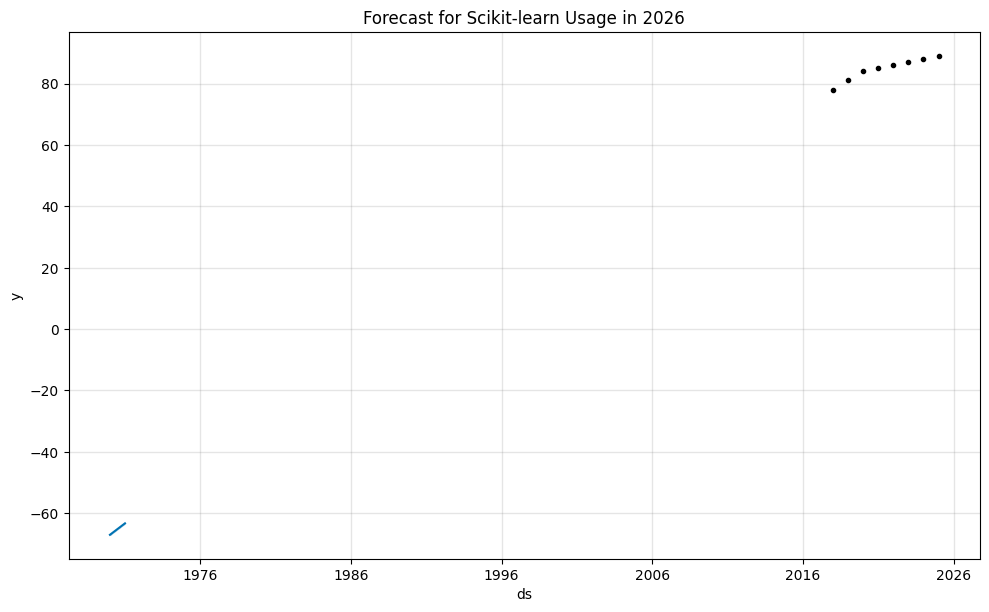

In [ ]:
from prophet import Prophet
tool = 'Scikit-learn'
prophet_df = df_trend[[tool]].reset_index()
prophet_df.columns = ['ds', 'y']

model = Prophet()
model.fit(prophet_df)

future = model.make_future_dataframe(periods=1, freq='Y')
forecast = model.predict(future)

model.plot(forecast)
plt.title(f'Forecast for {tool} Usage in 2026')
plt.show()